In [4]:
with open('no_indv_peak.txt', 'r') as f:
    indv = f.readlines()
    indv = [i.rstrip('\n') for i in indv]

In [29]:
with open('no_idr_peaks.txt', 'r') as f:
    idr = f.readlines()
    idr = [i.rstrip('\n') for i in idr]

In [12]:
indv_numbers = [int(indv[i]) for i in range(0, len(indv), 2)]
indv_fname = [indv[i].split('.basedon')[0].replace('./', '') for i in range(1, len(indv), 2)]

In [32]:
idr_numbers = [int(idr[i]) for i in range(0, len(idr), 2)]
idr_fname = [idr[i].split('.01v02.')[0].replace('./', '') for i in range(1, len(idr), 2)]

In [42]:
import pandas as pd
idr_df = pd.DataFrame([idr_numbers, idr_fname], index = ['no_peaks', 'uID']).T
indv_df = pd.DataFrame([indv_numbers, indv_fname], index = ['no_peaks', 'fname']).T

In [91]:
indv_df['uID'] = indv_df['fname'].str.split('_', expand = True)[0]
indv_df['rep'] = indv_df['fname'].str.split('_', expand = True)[1]

In [47]:
encode_data = pd.read_pickle('~/projects/eclip_encode_id.pickle')
eclip_bam = pd.read_csv('/home/hsher/projects/RBP_annot/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

In [49]:
eclip_bam.set_index('uID', inplace = True)

In [92]:
idr_df['rbp_name'] = idr_df['uID'].map(eclip_bam['RBP'])
indv_df['rbp_name'] = indv_df['uID'].map(eclip_bam['RBP'])

In [53]:
idr_df.sort_values('no_peaks')

,no_peaks,uID,rbp_name
98,10,475,UTP3
65,14,352,SBDS
177,19,668,PUS1
187,19,685,WDR3
113,21,506,SF3B1
...,...,...,...
161,18210,628,GRWD1
178,18266,670,AQR
84,18753,439,KHSRP
109,20246,495,PPIG


Text(0.5, 1.0, 'IDR peaks')

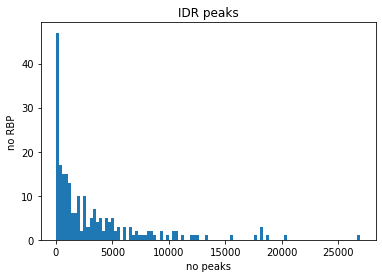

In [74]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,1)
b= ax.hist(idr_df['no_peaks'], bins = 100)
first_bins = idr_df.loc[idr_df['no_peaks']<b[1][1]]['rbp_name'].to_list()
ax.set_ylabel('no RBP')
ax.set_xlabel('no peaks')
ax.set_title('IDR peaks')
#ax.annotate(' '.join(first_bins),xy=(0, 45),xycoords='data',xytext=(4,45))


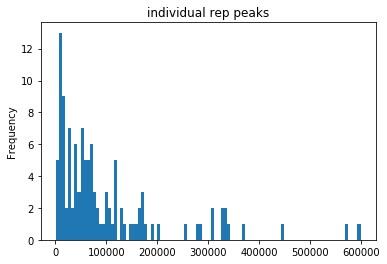

In [84]:
indv_df.loc[indv_df['rbp_name'].isin(first_bins)]['no_peaks'].plot.hist(bins = 100, title = 'individual rep peaks')

In [89]:
indv_df.pivot('uID')

AttributeError: 'SeriesGroupBy' object has no attribute 'unstack'

In [99]:
idr_df.set_index('uID', inplace = True)

In [100]:
indv_peaks = indv_df.pivot(index = 'uID', columns = 'rep', values = 'no_peaks')
indv_peaks['idr_peaks'] = indv_peaks.index.map(idr_df['no_peaks'])

In [101]:
indv_peaks

rep,01,02,idr_peaks
uID,,,
203,659563,487395,2938
204,151440,143510,6164
205,101234,125741,3554
206,159582,136546,5033
209,91631,50952,372
...,...,...,...
750,114241,105902,3303
752,192343,156342,7901
753,124478,91735,2069


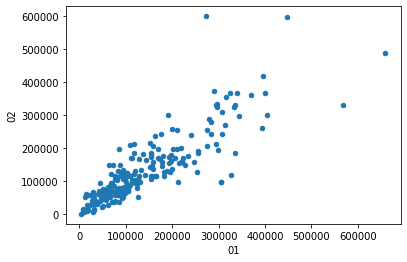

In [102]:
indv_peaks.plot.scatter(x = '01', y = '02')

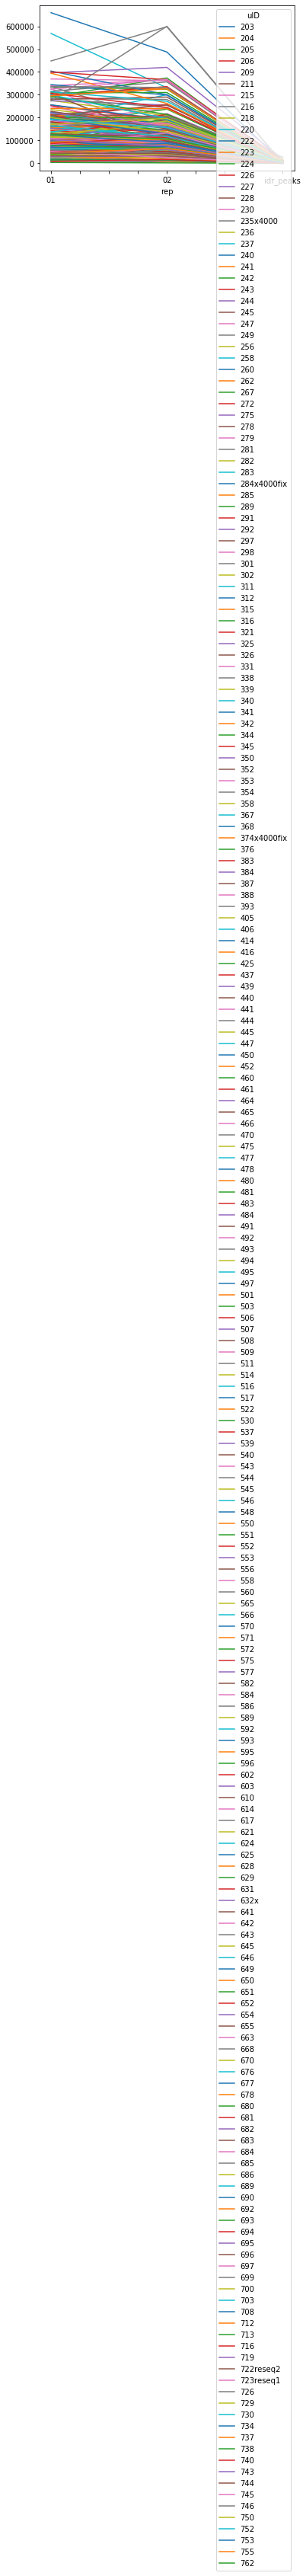

In [104]:
indv_peaks.T.plot(legend = F)

In [105]:
x = (1,2)
type(x) == tuple

True